In [ ]:
pip install hvplot

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib_inline as plt
import numpy as np
import plotly.graph_objects as go
import hvplot.pandas

In [15]:
path="2022_us(1).csv"
origin_data=pd.read_csv(path,encoding="ISO-8859-1")
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

FileNotFoundError: [Errno 2] No such file or directory: '2022_us(1).csv'

In [12]:
origin_data.head()

NameError: name 'origin_data' is not defined

In [24]:
col=["4. FACILITY NAME","5. STREET ADDRESS","6. CITY","8. ST","12. LATITUDE","13. LONGITUDE","14. HORIZONTAL DATUM","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","40. CLASSIFICATION","42. METAL CATEGORY","43. CARCINOGEN","47. UNIT OF MEASURE",
             "48. 5.1 - FUGITIVE AIR","49. 5.2 - STACK AIR","50. 5.3 - WATER","51. 5.4 - UNDERGROUND","52. 5.4.1 - UNDERGROUND CL I","53. 5.4.2 - UNDERGROUND C II-V","54. 5.5.1 - LANDFILLS","55. 5.5.1A - RCRA C LANDFILL","56. 5.5.1B - OTHER LANDFILLS",
             "57. 5.5.2 - LAND TREATMENT","58. 5.5.3 - SURFACE IMPNDMNT","59. 5.5.3A - RCRA SURFACE IM","60. 5.5.3B - OTHER SURFACE I","61. 5.5.4 - OTHER DISPOSAL","85. OFF-SITE RELEASE TOTAL","104. TOTAL RELEASES","116. PRODUCTION WSTE (8.1-8.7)"]
select_col=origin_data[col]
select_col.head(3)           


NameError: name 'origin_data' is not defined

In [25]:
new_col=select_col.copy()
new_col=new_col.rename(columns={"4. FACILITY NAME":"Facility name","5. STREET ADDRESS":"Street Address","6. CITY":"City","8. ST":"State","12. LATITUDE":"Latitude","13. LONGITUDE":"Longitude","14. HORIZONTAL DATUM":"Horizontal","15. PARENT CO NAME":"Parent Co Name","20. INDUSTRY SECTOR":"Industry Sector","34. CHEMICAL":"Chemical",
                "40. CLASSIFICATION":"Class","42. METAL CATEGORY":"Metal Cata","43. CARCINOGEN":"Carcinogen","47. UNIT OF MEASURE":"Unit","48. 5.1 - FUGITIVE AIR":"Fugitive Air","49. 5.2 - STACK AIR":"Stack Air","50. 5.3 - WATER":"Water","51. 5.4 - UNDERGROUND":"Underground","52. 5.4.1 - UNDERGROUND CL I":"Undergroud I","53. 5.4.2 - UNDERGROUND C II-V":"Underground II",
                "54. 5.5.1 - LANDFILLS":"Landfills","55. 5.5.1A - RCRA C LANDFILL":"RCRA C Landfill","56. 5.5.1B - OTHER LANDFILLS":"Other Landfills","57. 5.5.2 - LAND TREATMENT":"Land Treatment","58. 5.5.3 - SURFACE IMPNDMNT":"Surface IM","59. 5.5.3A - RCRA SURFACE IM":"RCRA Surface IM","60. 5.5.3B - OTHER SURFACE I":"Other Surface",
                "61. 5.5.4 - OTHER DISPOSAL":"Other Disposal","62. ON-SITE RELEASE TOTAL":"On_site release","85. OFF-SITE RELEASE TOTAL":"Off_site Disposal","104. TOTAL RELEASES":"Total Releases","116. PRODUCTION WSTE (8.1-8.7)":"Production WSTE"})
new_col.head(3)

NameError: name 'select_col' is not defined

In [26]:
State_group=new_col.groupby(["State"])
sum1=State_group["Total Releases"].sum()
release_sum_df=sum1.to_frame()
release_sum_df=release_sum_df.sort_values("Total Releases",ascending=False)
release_sum_df=release_sum_df.astype({"Total Releases":"long"})
release_sum_df.head(10)

NameError: name 'new_col' is not defined

In [27]:
bar=release_sum_df.plot(kind="bar", figsize = (12,6))
bar.set_xlabel ("State", size = 15)
bar.set_ylabel ("Total Releases", size = 15)
bar.set_title("Total Releases Of State",size=20)

NameError: name 'release_sum_df' is not defined

In [28]:
new=new_col["State"]=="TX"
TX_df=new_col.loc[new]
TX_df.head(2)

NameError: name 'new_col' is not defined

In [29]:
TX_Industry=TX_df.groupby(["Industry Sector"])
TX_Industry_sum=TX_Industry["Total Releases"].sum()

NameError: name 'TX_df' is not defined

In [30]:
plt.bar(TX_Industry_sum.index,TX_Industry_sum.values)
plt.Figure(figsize=(15,9))
plt.xticks(rotation="vertical", fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Total Releases",size=12)
plt.title("Total Releases By Industries")

AttributeError: module 'matplotlib_inline' has no attribute 'bar'

In [32]:
index=TX_Industry_sum.index
plt.pie(TX_Industry_sum,labels=index,autopct="%1.1f%%",shadow=True)
plt.title("Industry Releases Distribution")
plt.axis("equal")
plt.legend(loc='center left',bbox_to_anchor=(1.3,0,0.3,1),prop={"size":6}) 

NameError: name 'TX_Industry_sum' is not defined

In [ ]:
petro_pounds=(new_col["Industry Sector"]=="Petroleum") & (new_col["Unit"]=="Pounds")
select_col=new_col.loc[petro_pounds]
select_col.head(3)

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Certain glycol ethers,TRI,May contain metal,NO,Pounds,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Hydrogen cyanide,TRI,Non_Metal,NO,Pounds,0.0,32234.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32234.00,32234.00
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Cyclohexane,TRI,Non_Metal,NO,Pounds,250.0,750.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1005.29,7758.29


In [ ]:
select_col["Air"]=select_col["Fugitive Air"]+select_col["Stack Air"]
select_col["Land"]=select_col["Underground"]+select_col["Undergroud I"]+select_col["Underground II"]+select_col["Landfills"]+select_col["RCRA C Landfill"]+select_col["Other Landfills"]+select_col["Land Treatment"]+select_col["Surface IM"]+select_col["RCRA Surface IM"]+select_col["Other Surface"]+select_col["Other Disposal"]
select_col.head(3)


C:\Users\yixua\AppData\Local\Temp\ipykernel_33980\3802278295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_col["Air"]=select_col["Fugitive Air"]+select_col["Stack Air"]
C:\Users\yixua\AppData\Local\Temp\ipykernel_33980\3802278295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_col["Land"]=select_col["Underground"]+select_col["Undergroud I"]+select_col["Underground II"]+select_col["Landfills"]+select_col["RCRA C Landfill"]+select_col["Other Landfills"]+select_col["Land Treatment"]+sel

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE,Air,Land
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Certain glycol ethers,TRI,May contain metal,NO,Pounds,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Hydrogen cyanide,TRI,Non_Metal,NO,Pounds,0.0,32234.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32234.00,32234.00,32234.0,0.0
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Cyclohexane,TRI,Non_Metal,NO,Pounds,250.0,750.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1005.29,7758.29,1000.0,0.0


In [ ]:
new_col=select_col[["Water","Air","Land","Off_site Disposal"]]
new_col

,Water,Air,Land,Off_site Disposal
0,0.00,0.00,0.0,0.00
5,0.00,32234.00,0.0,0.00
8,0.29,1000.00,0.0,5.00
9,0.00,1.20,0.0,0.00
16,64.00,376.00,0.0,0.00
...,...,...,...,...
78764,0.00,0.00,0.0,4.33
78768,0.00,639.50,0.0,0.00
78804,0.00,37.00,0.0,0.00
78805,1.00,29.00,0.0,5.00


In [ ]:
new_sum=new_col.sum()
new_sum

Water                33921468.87
Air                  34199159.60
Land                  4391351.12
Off_site Disposal     7789189.60
dtype: float64

(0.0, 41199159.6)

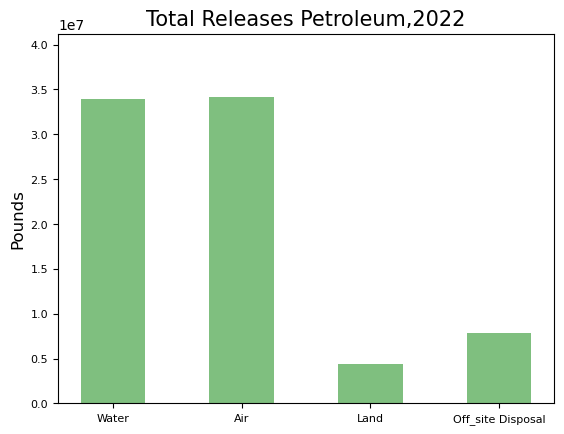

In [ ]:
plt.bar(new_sum.index,new_sum.values,color='g',alpha=0.5,width=0.5)
plt.Figure(figsize=(15,9))
plt.xticks(rotation="horizontal", fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel("Pounds",size=12)
plt.title("Total Releases Petroleum,2022",size=15)
plt.ylim(0, max(new_sum.values)+7000000)


In [ ]:
air_sum=select_col.groupby(["Chemical"])["Air"].sum()
sort_air=air_sum.sort_values(ascending=False)
sort_air=sort_air.to_frame()
other=sort_air["Air"] < 2451944.98
Other_Chemicals=sort_air.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Ammonia":5842586.71,"Sulfuric acid":5079506.33,"Hydrogen cyanide":4847537.38,"n-Hexane":2880246.60,"Toluene":2451944.98,"Other Chemicals":Other_sum[0]},index=[1])
Chemical_df


C:\Users\yixua\AppData\Local\Temp\ipykernel_33980\2512968906.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Ammonia":5842586.71,"Sulfuric acid":5079506.33,"Hydrogen cyanide":4847537.38,"n-Hexane":2880246.60,"Toluene":2451944.98,"Other Chemicals":Other_sum[0]},index=[1])


,Ammonia,Sulfuric acid,Hydrogen cyanide,n-Hexane,Toluene,Other Chemicals
1,5842586.71,5079506.33,4847537.38,2880246.6,2451944.98,13097337.6


(-1.0999999542597945, 1.0999990481637, -1.0999977432195691, 1.099997362118525)

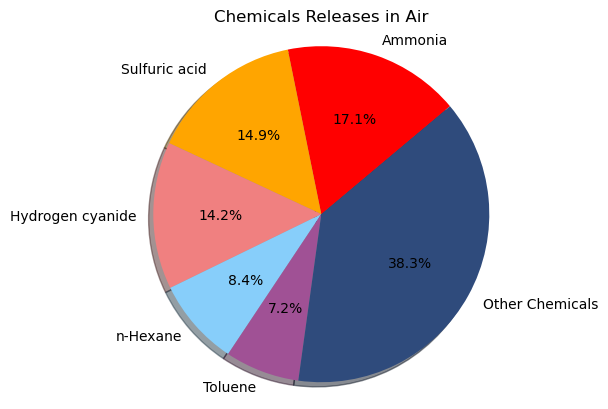

In [ ]:
labels=["Ammonia","Sulfuric acid","Hydrogen cyanide","n-Hexane","Toluene","Other Chemicals"]
values=[5842586.71,5079506.33,4847537.38,2880246.6,2451944.98,13097337.6]
colors = ["red", "orange", "lightcoral", "lightskyblue","#a05195","#2f4b7c"]
plt.pie(values,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=40)
plt.title("Chemicals Releases in Air")
plt.axis("equal")

In [ ]:
water_sum=select_col.groupby(["Chemical"])["Water"].sum()
sort_water=water_sum.sort_values(ascending=False)
sort_water=sort_water.to_frame()
other=sort_water["Water"] < 26260.20
Other_Chemicals=sort_water.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Ammonia":366618.55,"Ethylene glycol":56017.08,"Methanol":46429.81,"Zinc compounds":26260.20,"Other Chemicals":Other_sum[0]},index=[1])
Chemical_df

C:\Users\yixua\AppData\Local\Temp\ipykernel_33980\2049675350.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Ammonia":366618.55,"Ethylene glycol":56017.08,"Methanol":46429.81,"Zinc compounds":26260.20,"Other Chemicals":Other_sum[0]},index=[1])


,Nitrate compounds,Ammonia,Ethylene glycol,Methanol,Zinc compounds,Other Chemicals
1,33300832.82,366618.55,56017.08,46429.81,26260.2,125310.41


(-1.0999996768861433,
 1.0999995636796043,
 -1.0999996054539956,
 1.0999997841369544)

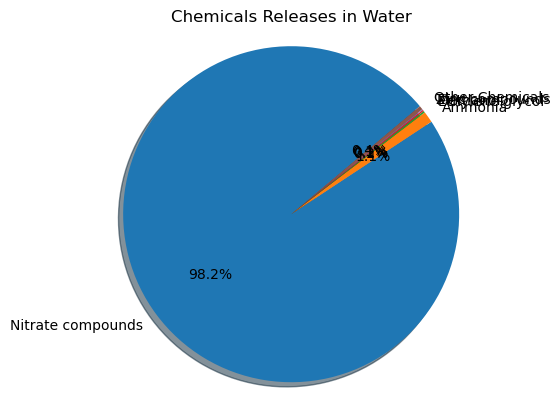

In [ ]:
labels=["Nitrate compounds","Ammonia","Ethylene glycol","Methanol","Zinc compounds","Other Chemicals"]
values=[33300832.82,366618.55,56017.08,46429.81,26260.2,125310.41]
plt.pie(values,labels=labels,autopct="%1.1f%%",shadow=True,startangle=40)
plt.title("Chemicals Releases in Water")
plt.axis("equal")

C:\Users\yixua\AppData\Local\Temp\ipykernel_33980\1111948068.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Other Chemicals":Other_sum[0]},index=[1])


(-1.0999996768861433,
 1.0999995636796043,
 -1.0999996054539956,
 1.0999997841369544)

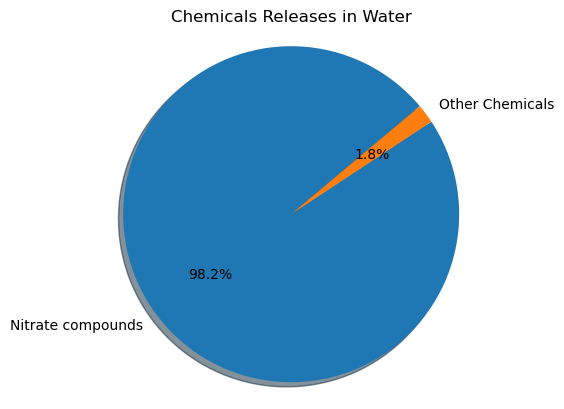

In [ ]:
water_sum=select_col.groupby(["Chemical"])["Water"].sum()
sort_water=water_sum.sort_values(ascending=False)
sort_water=sort_water.to_frame()
other=sort_water["Water"] < 33300832.82
Other_Chemicals=sort_water.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Other Chemicals":Other_sum[0]},index=[1])
labels=["Nitrate compounds","Other Chemicals"]
values=[33300832.82,620636.05]
plt.pie(values,labels=labels,autopct="%1.1f%%",shadow=True,startangle=40)
plt.title("Chemicals Releases in Water")
plt.axis("equal")

In [ ]:
land_sum=select_col.groupby(["Chemical"])["Land"].sum()
sort_land=land_sum.sort_values(ascending=False)
sort_land=sort_land.to_frame()
other=sort_land["Land"] < 105370.44
Other_Chemicals=sort_land.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Hydrogen sulfide":1775650.87,"Ammonia":1474424.71,"Nitrate compounds":273632.63,"tert-Butyl alcohol":260000.00,"Toluene":105370.44,"Other Chemicals":Other_sum[0]},index=[1])
Chemical_df

C:\Users\yixua\AppData\Local\Temp\ipykernel_33980\954886152.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Hydrogen sulfide":1775650.87,"Ammonia":1474424.71,"Nitrate compounds":273632.63,"tert-Butyl alcohol":260000.00,"Toluene":105370.44,"Other Chemicals":Other_sum[0]},index=[1])


,Hydrogen sulfide,Ammonia,Nitrate compounds,tert-Butyl alcohol,Toluene,Other Chemicals
1,1775650.87,1474424.71,273632.63,260000.0,105370.44,502272.47


(-1.099998828188293,
 1.0999999414538135,
 -1.0999988940099392,
 1.0999929780037463)

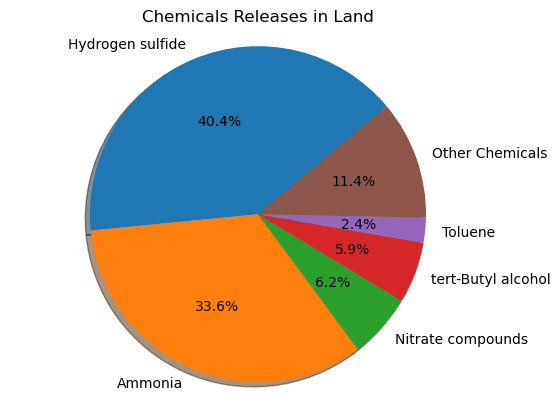

In [ ]:
labels=["Hydrogen sulfide","Ammonia","Nitrate compounds","tert-Butyl alcohol","Toluene","Other Chemicals"]
values=[1775650.87,1474424.71,273632.63,260000.0,105370.44,502272.47]
plt.pie(values,labels=labels,autopct="%1.1f%%",shadow=True,startangle=40)
plt.title("Chemicals Releases in Land")
plt.axis("equal")

In [19]:
fig = go.Figure(go.Scattergeo(
    locationmode="USA-states",
    lon = TX_df['Longitude'],
    lat = TX_df['Latitude'],
    text = locations,
    mode="markers"))
    #marker=dict(size=10, color="red", opacity=0.8),
fig.show()

NameError: name 'TX_df' is not defined